In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Data cleaning

## Imp: The fact that it has no null values but it does contain ? marks

In [8]:
df[df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [9]:
df['horsepower'] = df['horsepower'].replace('?',np.nan) #replace ? with nan

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Now checking the datatypes

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

#### Note: The object data type is not accepted

In [13]:
df['horsepower'] = df['horsepower'].astype('float64')

#### Note:
- plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot.

- plt.subplot(1, 2, 2)
#the figure has 1 row, 2 columns, and this plot is the second plot.

C:\Users\shahd\AppData\Local\Temp\ipykernel_6148\3146579538.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cylinders'], color= 'purple')
C:\Users\shahd\AppData\Local\Temp\ipykernel_6148\3146579538.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement'], color= 'green')
C:

C:\Users\shahd\AppData\Local\Temp\ipykernel_6148\3146579538.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'], color= 'red')
C:\Users\shahd\AppData\Local\Temp\ipykernel_6148\3146579538.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['acceleration'], color= 'pink')
C:\User

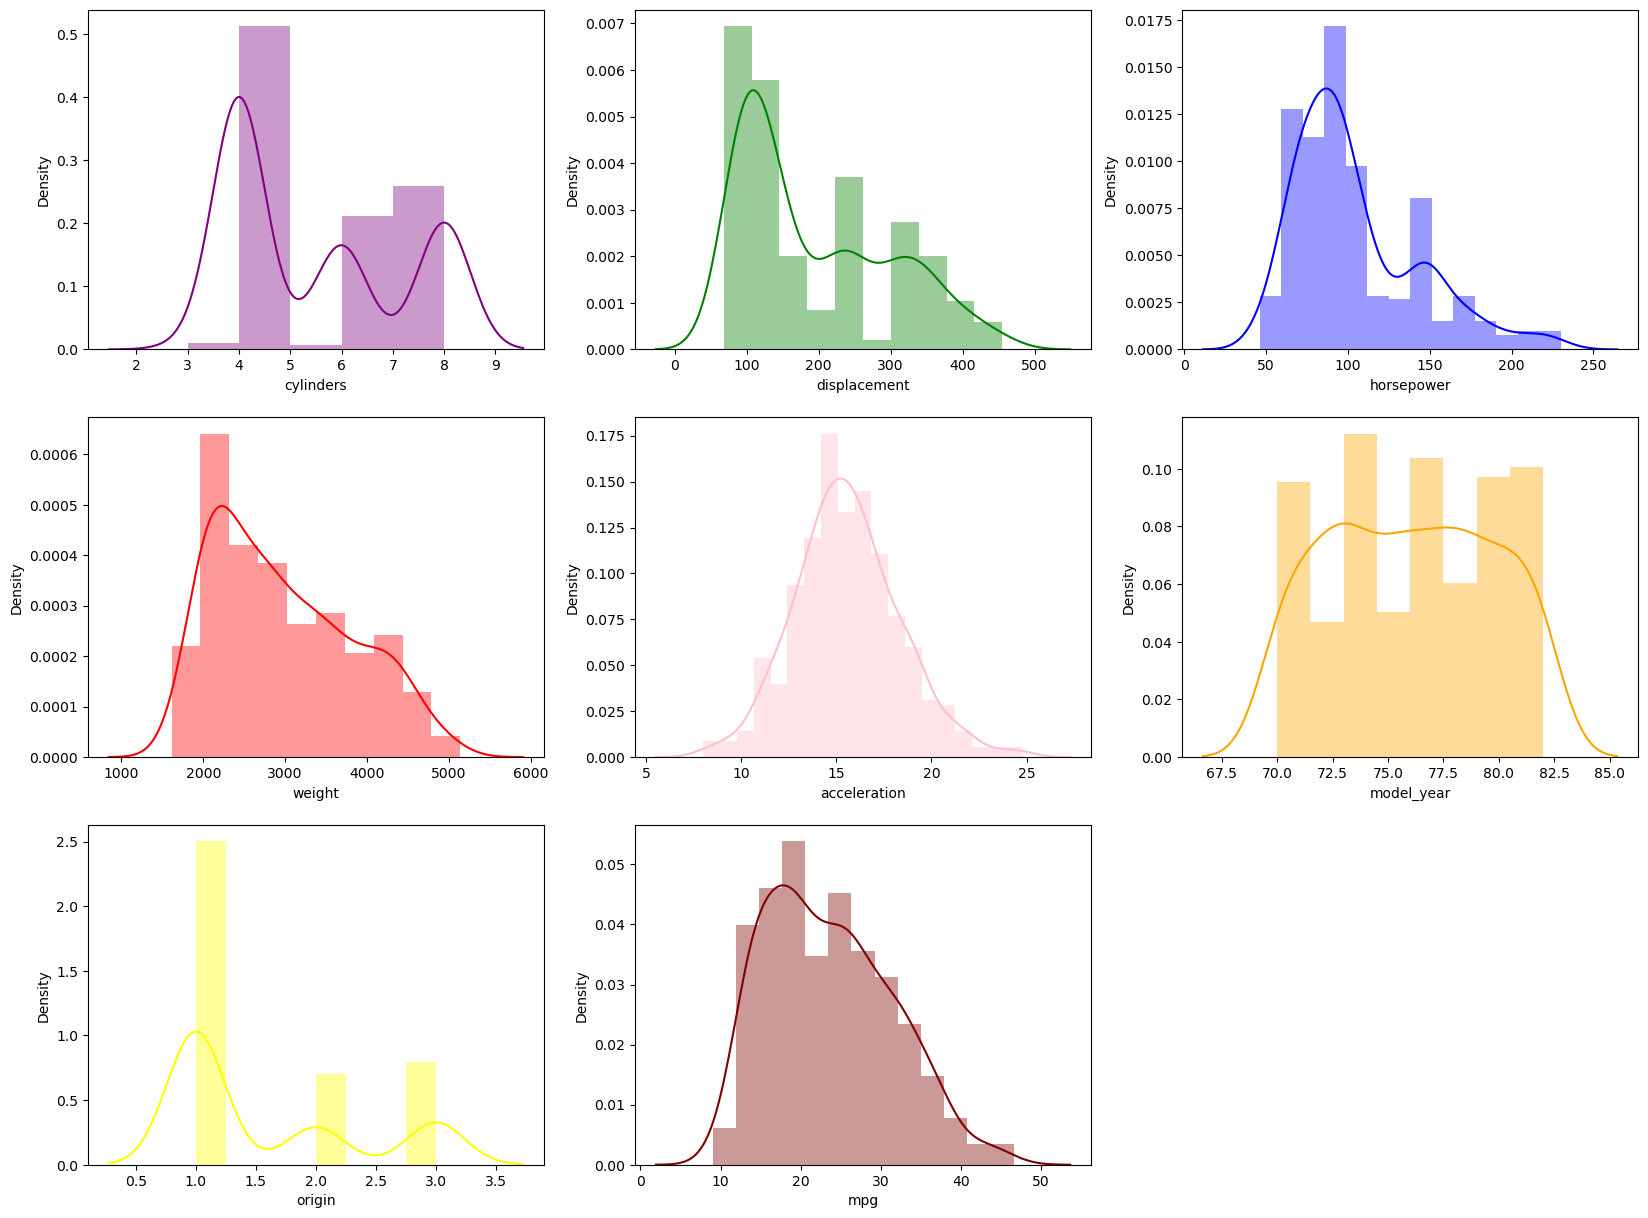

In [14]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.distplot(df['cylinders'], color= 'purple')

plt.subplot(3,3,2)
sns.distplot(df['displacement'], color= 'green')

plt.subplot(3,3,3)
sns.distplot(df['horsepower'], color= 'blue')

plt.subplot(3,3,4)
sns.distplot(df['weight'], color= 'red')

plt.subplot(3,3,5)
sns.distplot(df['acceleration'], color= 'pink')

plt.subplot(3,3,6)
sns.distplot(df['model_year'], color= 'orange')

plt.subplot(3,3,7)
sns.distplot(df['origin'], color= 'yellow')

plt.subplot(3,3,8)
sns.distplot(df['mpg'], color= 'maroon')

plt.show()

# Subplots are a way to display multiple plots or visualizations within a single figure in various rows and columns...comparative analysis.

In [15]:
df.corr()

C:\Users\shahd\AppData\Local\Temp\ipykernel_6148\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


The value of r ranges from -1 to 1:

Positive Correlation: If r is close to 1, it indicates a strong positive correlation. This means that as one variable increases, the other variable tends to increase as well.

Negative Correlation: If r is close to -1, it indicates a strong negative correlation. This means that as one variable increases, the other variable tends to decrease.

No Correlation: If r is close to 0, it indicates little to no linear correlation between the variables.

# Data Pre-Processing 

In [16]:
df = df.drop('name',axis= 1)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [18]:
df.shape

(398, 8)

# Separate the dependent and independent features

In [19]:
from sklearn import preprocessing

In [20]:
X = df.drop('mpg', axis= 1)
y = df[['mpg']]

In [21]:
# scale all the columns of data.
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.30, random_state=1)

In [23]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (278, 7)
X_test (120, 7)
y_train (278, 1)
y_test (120, 1)


# Building a Linear regression Model

In Python, the enumerate() function is used to iterate over a sequence (such as a list, tuple, or string) while keeping track of both the index and the value of each element. This can be quite useful when you need to access both the position and the value of elements in a loop. 

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is: {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is: -0.0856143689556262
The coefficient for displacement is: 0.3044182253593026
The coefficient for horsepower is: -0.09718466302484176
The coefficient for weight is: -0.7628632829136766
The coefficient for acceleration is: 0.021591275172924865
The coefficient for model_year is: 0.3749408074118716
The coefficient for origin is: 0.12302637024556866


In [25]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.012833128293992942


# Building a Ridge regression Model

In [26]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train, y_train)

for i, col_name in enumerate(X_train.columns):
    print("The Ridge model coefficient for {} is: {}".format(col_name, ridge.coef_[0][i]))

The Ridge model coefficient for cylinders is: -0.08073001909555903
The Ridge model coefficient for displacement is: 0.28822207417231765
The Ridge model coefficient for horsepower is: -0.09985675156605957
The Ridge model coefficient for weight is: -0.7510550916024521
The Ridge model coefficient for acceleration is: 0.019127698314833613
The Ridge model coefficient for model_year is: 0.37378312489584314
The Ridge model coefficient for origin is: 0.12212717285800313


# Building a Lasso regression Model

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print("Lasso model coefficient for {} is: {}".format(col_name, lasso.coef_[i]))

Lasso model coefficient for origin is: -0.0
Lasso model coefficient for origin is: -0.0
Lasso model coefficient for origin is: -0.013280002937314456
Lasso model coefficient for origin is: -0.6205207866794484
Lasso model coefficient for origin is: 0.0
Lasso model coefficient for origin is: 0.29198732924913473
Lasso model coefficient for origin is: 0.02156765397988056


# Compare the Score

In [28]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567305


In [29]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140553


In [30]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161
